# Introduction

In this notebook, we will be using the KS solver for Case 1.


In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
davinci_path = os.path.abspath(os.path.join('..', r"A:\daVinci" ))
sys.path.append(davinci_path)
from daVinci import *

from ks_solver import *


# Setup

For this case, we will use the following ratios to determine the data. First is CFL which handles stability in the solve for the advective condition. Second is the signal to noise ratio for the initial values.


In [2]:
CFL = 0.1
SNR = 0.05


Second, we can set up the coefficients for the calculation.


Next, we will set up the domain for space and time.


In [3]:
x = np.linspace( -2 * np.pi , 2 * np.pi , num=200 )
t_bounds = (0,6)


In [4]:
alpha1 = 1 * ( np.mean( np.gradient( x ) ) ** 2 )
gamma1 = 1 * ( np.mean( np.gradient( x ) ) ** 4 )

In [5]:
alpha1


np.float64(0.003987618252504476)

In [6]:
gamma1


np.float64(1.5901099327706845e-05)

Now, let's initialize the function.


In [7]:
L = np.max( x ) - np.min( x )
u_0 = np.sin( x ) - 2*np.sin( x/2 )
#u_0 = np.sin( x ) - np.sin( x/2 )/2
u_0 = u_0 + SNR * np.max(u_0) * np.random.rand( len(x) ) 


Text(0.5, 1.0, 'Initialized Values for u')

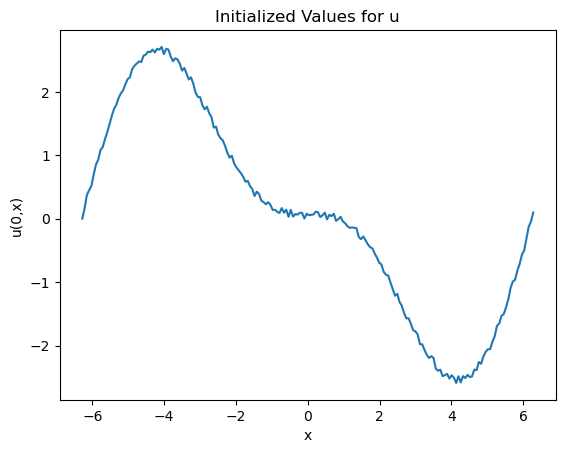

In [8]:
plt.plot( x , u_0 )
plt.xlabel("x")
plt.ylabel("u(0,x)")
plt.title("Initialized Values for u")


In [9]:
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_case1 = KS( x , u_0 , t_bounds , dt , alpha=alpha1 , gamma=gamma1 )


In [10]:
ks_case1.solve( n_xOrder=6 , n_tOrder=1 , bc_xOrder=5 , bc_dudx=(0,0) , bc_d4udx4=(1,-1) , bc_u=(None,None) )


Eulerian time stepping selected
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:203: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  cls.A_advect[np.abs(cls.A_advect)*cls.dx<=zero_tol]=0
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:457: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.D , cls.phi[i,:] )


Hello there


In [11]:
ks_case1.A.toarray()[-3] * ks_case1.dx


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [12]:
ks_case1.B.toarray()[-3] * ( ks_case1.dx ** 2)


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [13]:
ks_case1.D.toarray()[-2]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
ks_case1.Av_k


array([ 0.00000000e+00,  0.00000000e+00, -2.38280007e-01, -1.79217309e-01,
       -4.80518374e-02, -1.33900734e-02, -3.47493587e-04,  5.18474392e-04,
       -2.04140356e-03, -1.78699949e-03,  9.45386925e-04,  1.64684162e-03,
       -1.71848450e-03, -5.98987983e-03, -6.20607210e-03, -3.22291518e-04,
        8.98318515e-03,  1.62450535e-02,  1.70538443e-02,  1.05929195e-02,
       -8.35430567e-04, -1.39466783e-02, -2.60979847e-02, -3.57876472e-02,
       -4.25526628e-02, -4.66838310e-02, -4.88843601e-02, -4.99507226e-02,
       -5.05526680e-02, -5.11382317e-02, -5.19374844e-02, -5.30185494e-02,
       -5.43553571e-02, -5.58828666e-02, -5.75308525e-02, -5.92369563e-02,
       -6.09430958e-02, -6.25786056e-02, -6.40320629e-02, -6.51158549e-02,
       -6.55374326e-02, -6.49099809e-02, -6.28524854e-02, -5.92136067e-02,
       -5.43656751e-02, -4.93714193e-02, -4.57728886e-02, -4.49661185e-02,
       -4.75124531e-02, -5.28823471e-02, -5.97997053e-02, -6.68864715e-02,
       -7.31692661e-02, -

In [15]:
ks_case1.phi[2]


array([ 0.        ,  1.        ,  0.37687221,  0.4469825 ,  0.51210749,
        0.67840448,  0.84120697,  0.9212552 ,  1.06876436,  1.12328697,
        1.23711849,  1.34755427,  1.4692443 ,  1.59757661,  1.71823446,
        1.78309276,  1.88444954,  1.96533246,  2.01318637,  2.09654552,
        2.19031189,  2.21418413,  2.33058442,  2.40472104,  2.43675637,
        2.47927585,  2.46291305,  2.54931785,  2.58315109,  2.63001378,
        2.6236573 ,  2.66780752,  2.62689971,  2.67071607,  2.6617808 ,
        2.7198089 ,  2.61253688,  2.65705192,  2.68669359,  2.59503339,
        2.4907446 ,  2.5210162 ,  2.52329969,  2.47756633,  2.35057955,
        2.37536808,  2.32135358,  2.20615773,  2.23077927,  2.1594774 ,
        2.01635319,  1.92667872,  1.92787966,  1.81660707,  1.72658731,
        1.76765518,  1.683497  ,  1.62504007,  1.45588927,  1.45546877,
        1.3461093 ,  1.27449257,  1.24394062,  1.16250552,  1.05390684,
        0.96756319,  0.99409151,  0.88698455,  0.81332283,  0.76

In [16]:
ks_case1.u[3]


array([-0.04991349,  0.15698074,  0.37687221,  0.4469825 ,  0.51210749,
        0.67840448,  0.84120697,  0.9212552 ,  1.06876436,  1.12328697,
        1.23711849,  1.34755427,  1.4692443 ,  1.59757661,  1.71823446,
        1.78309276,  1.88444954,  1.96533246,  2.01318637,  2.09654552,
        2.19031189,  2.21418413,  2.33058442,  2.40472104,  2.43675637,
        2.47927585,  2.46291305,  2.54931785,  2.58315109,  2.63001378,
        2.6236573 ,  2.66780752,  2.62689971,  2.67071607,  2.6617808 ,
        2.7198089 ,  2.61253688,  2.65705192,  2.68669359,  2.59503339,
        2.4907446 ,  2.5210162 ,  2.52329969,  2.47756633,  2.35057955,
        2.37536808,  2.32135358,  2.20615773,  2.23077927,  2.1594774 ,
        2.01635319,  1.92667872,  1.92787966,  1.81660707,  1.72658731,
        1.76765518,  1.683497  ,  1.62504007,  1.45588927,  1.45546877,
        1.3461093 ,  1.27449257,  1.24394062,  1.16250552,  1.05390684,
        0.96756319,  0.99409151,  0.88698455,  0.81332283,  0.76

In [17]:
ks_case1.E.toarray()[-3]



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [18]:
ks_case1.Ee


array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [19]:
ks_case1.e


array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [20]:
ks_case1.E.dot( ks_case1.e )


array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

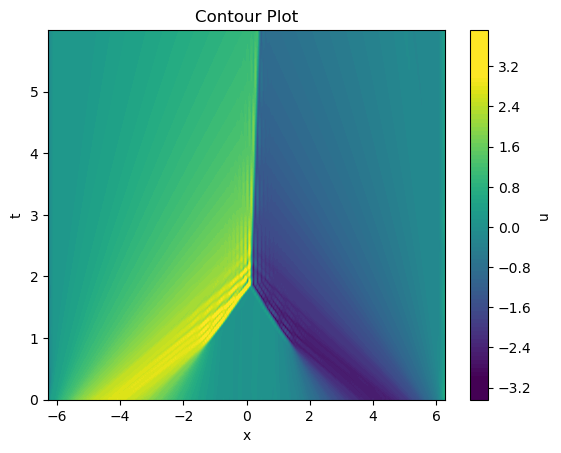

In [21]:
x = ks_case1.x
y = ks_case1.t
X , Y = np.meshgrid( x , y )
Z = ks_case1.u

# Set the limits for the color scale
contour = plt.contourf(X, Y, Z, levels=100, cmap='viridis', vmin=-3, vmax=3 )

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('u')

# Add axis labels
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour Plot')

plt.show()


# Data Interpretation 

Another way to work through the data is to look at the spectral domain. To do this, we will import some objects from Project da Vinci.



In [22]:
spectral_case1 = SpectralData( { "case1" : ks_case1.u.T } , dt = ks_case1.dx , fft_method="real" )


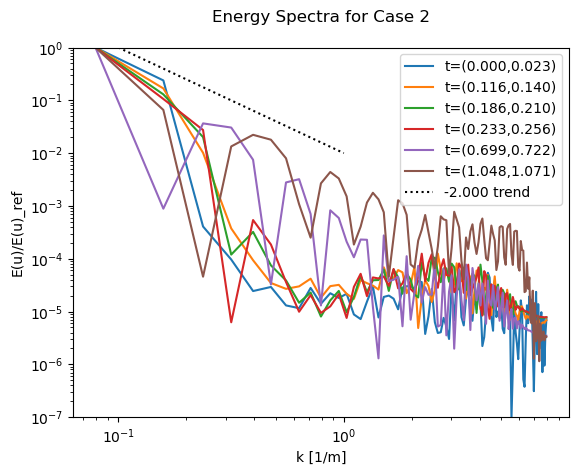

In [23]:
t_span = 10
starting_points = [0 , 50 , 80 , 100 , 300 , 450 ]

for i , t in enumerate( starting_points ):
    t_start = t
    t_end = t_start + t_span
    x = spectral_case1.frequency_data["case1"]
    y = np.mean( spectral_case1.energy_spectra["case1"].T[t_start:t_end] , axis=0 ) / np.mean( spectral_case1.energy_spectra["case1"].T[t_start:t_end] , axis=0 )[1]

    plt.loglog( x , y , label = f"t=({ks_case1.t[t_start]:.3f},{ks_case1.t[t_end]:.3f})" )

#
# Trendline 1
#
x_trend = np.logspace( -1 , 0 , num=10 )
A = 1e-2
b = 2
y_trend = A * ( x_trend ** -b )
plt.loglog( x_trend , y_trend , ':k' , label=f"-{b:.3f} trend")


plt.title("Energy Spectra for Case 2\n")
plt.xlabel("k [1/m]")
plt.ylabel("E(u)/E(u)_ref")
plt.ylim((1e-7,1))
plt.legend( loc="best" )

plt.show()


In [24]:
integral_length_scale = np.trapz( np.sqrt(spectral_case1.energy_spectra["case1"].T[:,:]) , x=(spectral_case1.frequency_data["case1"][:]) ) / np.sqrt( spectral_case1.energy_spectra["case1"][2,:].T )


C:\Users\mtthl\AppData\Local\Temp\ipykernel_13656\538127332.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_length_scale = np.trapz( np.sqrt(spectral_case1.energy_spectra["case1"].T[:,:]) , x=(spectral_case1.frequency_data["case1"][:]) ) / np.sqrt( spectral_case1.energy_spectra["case1"][2,:].T )


In [25]:
integral_length_scale


array([0.28488858, 0.29736177, 0.29915861, ..., 0.96262389, 0.96285963,
       0.96309513])

Text(0.5, 1.0, 'Integral Length Scale Along Time')

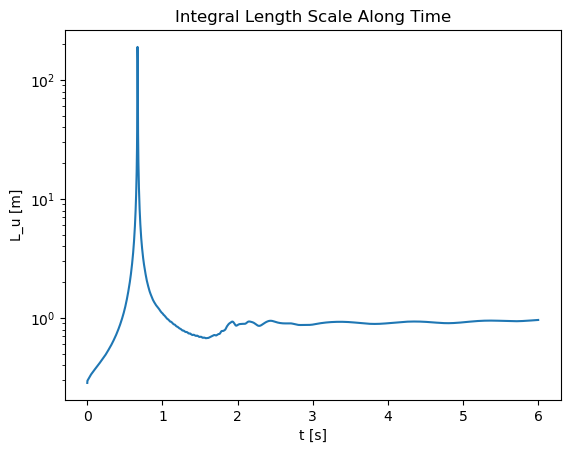

In [26]:
plt.semilogy( ks_case1.t , integral_length_scale )
plt.xlabel("t [s]")
plt.ylabel("L_u [m]")
plt.title("Integral Length Scale Along Time")



In [27]:
spectral_case1.correlations()


# Regime

One point of interest is the non-dimensional 


In [28]:
Re_cell_max = np.max( np.abs( ks_case1.u ) , axis=-1 ) * ks_case1.dx / -ks_case1.alpha
Re_cell_max


array([-42.93097747, -42.98532615, -43.03232106, ..., -19.47538238,
       -19.48384192, -19.49212321])

In [29]:
Re_cell_min = np.min( np.abs( ks_case1.u ) , axis=-1 ) * ks_case1.dx / -ks_case1.alpha
Re_cell_min


array([-0.02014516, -0.06852119, -0.08758756, ..., -1.29969881,
       -1.3000499 , -1.30040413])

In [30]:
Re_Lu_max = np.max( ks_case1.u , axis=-1 ) * integral_length_scale / -ks_case1.alpha
Re_Lu_max


array([-193.68189815, -202.41773831, -203.86351006, ..., -294.03128185,
       -294.51576715, -294.99757882])

In [31]:
Re_Lu_min = np.min( np.abs( ks_case1.u ) , axis=-1 ) * integral_length_scale / ks_case1.alpha
Re_Lu_min


array([ 0.09088434,  0.32266601,  0.41494178, ..., 19.81265011,
       19.82285547, 19.83310618])

In [32]:
NS_max = 2*( ks_case1.gamma / ( integral_length_scale**2 ) ) * np.max( np.gradient( ks_case1.u , axis=-1 ) , axis=-1 )
NS_max


array([7.34529691e-05, 8.52554173e-05, 8.70625511e-05, ...,
       8.23398745e-06, 8.22902564e-06, 8.22407401e-06])

In [33]:
NS_min = 2*( ks_case1.gamma / ( integral_length_scale**2 ) ) * np.min( np.abs( np.gradient( ks_case1.u , axis=-1 ) ) , axis=-1 )
NS_min


array([5.73263982e-08, 5.84748659e-08, 6.56067510e-08, ...,
       3.60084610e-10, 1.33757374e-10, 9.04193424e-11])

Text(0.5, 1.0, 'Comparison of Re_cell Bounds Throughout Time\n')

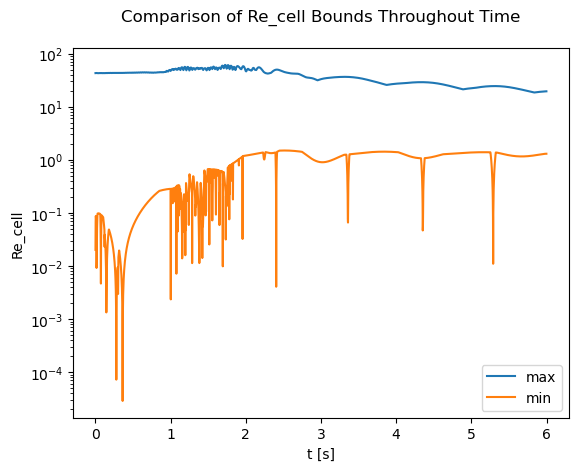

In [34]:
plt.semilogy( ks_case1.t , -Re_cell_max , label="max" )
plt.semilogy( ks_case1.t , -Re_cell_min , label="min" )
plt.xlabel("t [s]")
plt.ylabel("Re_cell")
#plt.ylim((1e-3,1e3))
plt.legend(loc = "best" )
plt.title("Comparison of Re_cell Bounds Throughout Time\n")


Text(0.5, 1.0, 'Comparison of Re_Lu Bounds Throughout Time\n')

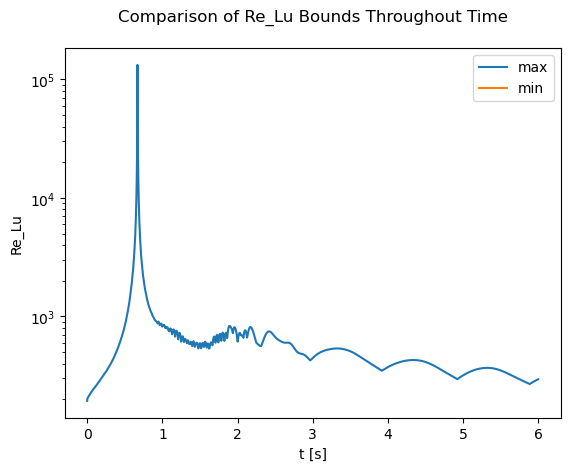

In [35]:
plt.semilogy( ks_case1.t , -Re_Lu_max , label="max" )
plt.semilogy( ks_case1.t , -Re_Lu_min , label="min" )
plt.xlabel("t [s]")
plt.ylabel("Re_Lu")
#plt.ylim((1,1e5))
plt.legend(loc = "best" )
plt.title("Comparison of Re_Lu Bounds Throughout Time\n")


Text(0.5, 1.0, 'Comparison of Nondimensional Stiffness Bounds Throughout Time\n')

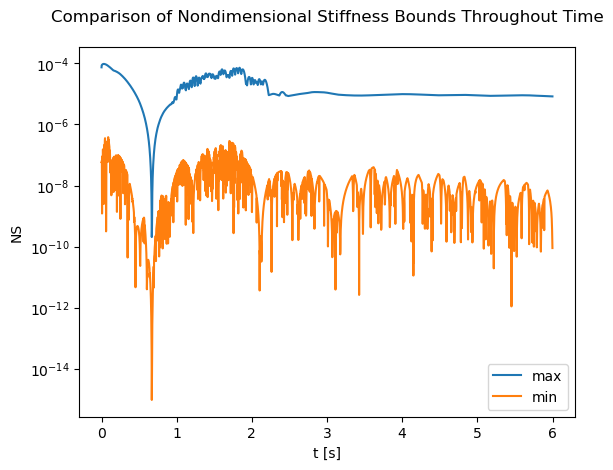

In [36]:
plt.semilogy( ks_case1.t , NS_max , label="max" )
plt.semilogy( ks_case1.t , NS_min , label="min" )
plt.xlabel("t [s]")
plt.ylabel("NS")
#plt.ylim((1e-10,1))
plt.legend(loc = "best" )
plt.title("Comparison of Nondimensional Stiffness Bounds Throughout Time\n")
